In [0]:
from __future__ import print_function, division
import datetime
import time
import torch.optim as optim
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [0]:
img_transform = transforms.Compose([
    #transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [0]:
dataset = MNIST('./data', transform=img_transform,download=True)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)
train_set,test_set=torch.utils.data.random_split(dataset, [59900, 100])

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


In [0]:

class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels= 8,kernel_size= 5, stride=2, padding=1),  # 13*13
            nn.ReLU(True),
            nn.MaxPool2d(2, stride=2), # 6*6
            nn.Conv2d(in_channels=8,out_channels=16,kernel_size=3, stride=2,padding=1) # 3*3        
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(in_channels=16, out_channels=32,kernel_size= 3, stride=2, padding=0),#7*7
            nn.ReLU(True),
            nn.ConvTranspose2d(in_channels=32,out_channels=16,kernel_size= 5, stride=3,padding=1), #21*21
            nn.ReLU(True),
            nn.ConvTranspose2d(in_channels=16,out_channels=8, kernel_size=5, stride=1, padding=1),  #23*23
            nn.ReLU(True),
            nn.ConvTranspose2d(in_channels=8,out_channels=1, kernel_size=3, stride=1, padding=0),#25*25
            nn.ReLU(True),
            nn.ConvTranspose2d(in_channels=1,out_channels=1,kernel_size= 4, stride=1, padding=0),  #28*28
            nn.Tanh()

        )

    def forward(self, x):
        x = self.encoder(x)
        #print(x.shape)
        x = self.decoder(x)
        #print(x.shape)
        return x


model = autoencoder().cuda()
model.to(device)

autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(32, 16, kernel_size=(5, 5), stride=(3, 3), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(16, 8, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(8, 1, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU(inplace=True)
    (8): ConvTranspose2d(1, 1, kernel_size=(4, 4), stride=(1, 1))
    (9): Tanh()
  )
)

In [0]:
criterion = nn.MSELoss()
#criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=.01, weight_decay=1e-5)

num_epochs=50
for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data       
        img = img.view(img.size(0), -1)
        img = Variable(img).cuda()
        optimizer.zero_grad()
        # ===================forward=====================
        #print(img.shape)
        img=img.reshape(-1,1,28,28)  ## while trainig a fully connected layer you wont need this as we need c,h,w
        #img=img.reshape(-1,28,28)
        #print(img.shape)
        output = model(img)
        loss = criterion(output, img)
        # ===================backward====================
        loss.backward()
        optimizer.step()
    # ===================log========================
    
    print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, num_epochs, loss.data))


epoch [1/50], loss:0.4082
epoch [2/50], loss:0.3932
epoch [3/50], loss:0.3813
epoch [4/50], loss:0.3735
epoch [5/50], loss:0.3746
epoch [6/50], loss:0.3829
epoch [7/50], loss:0.3861
epoch [8/50], loss:0.3733
epoch [9/50], loss:0.3376
epoch [10/50], loss:0.3693
epoch [11/50], loss:0.4099
epoch [12/50], loss:0.2997
epoch [13/50], loss:0.3010
epoch [14/50], loss:0.3062
epoch [15/50], loss:0.0899
epoch [16/50], loss:0.0749
epoch [17/50], loss:0.0686
epoch [18/50], loss:0.0657
epoch [19/50], loss:0.0543
epoch [20/50], loss:0.0626
epoch [21/50], loss:0.0416
epoch [22/50], loss:0.0432
epoch [23/50], loss:0.0407
epoch [24/50], loss:0.0462
epoch [25/50], loss:0.0953
epoch [26/50], loss:0.0425
epoch [27/50], loss:0.0304
epoch [28/50], loss:0.0368
epoch [29/50], loss:0.0364
epoch [30/50], loss:0.0320
epoch [31/50], loss:0.0338
epoch [32/50], loss:0.0319
epoch [33/50], loss:0.0295
epoch [34/50], loss:0.0376
epoch [35/50], loss:0.0316
epoch [36/50], loss:0.0298
epoch [37/50], loss:0.0268
epoch [38/

In [0]:
torch.save(model.state_dict(), 'test_conv_auto_033.pth')

In [0]:
model.load_state_dict(torch.load('test_conv_auto_033.pth'))
model.eval()

autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 8, kernel_size=(5, 5), stride=(2, 2), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(32, 16, kernel_size=(5, 5), stride=(3, 3), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): ConvTranspose2d(16, 8, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(8, 1, kernel_size=(3, 3), stride=(1, 1))
    (7): ReLU(inplace=True)
    (8): ConvTranspose2d(1, 1, kernel_size=(4, 4), stride=(1, 1))
    (9): Tanh()
  )
)

3


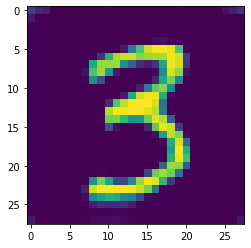

0


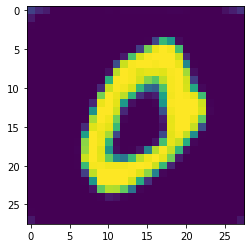

2


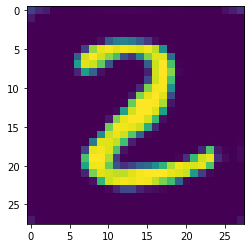

1


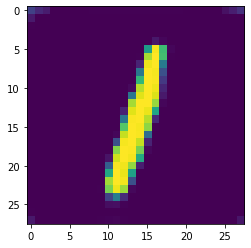

6


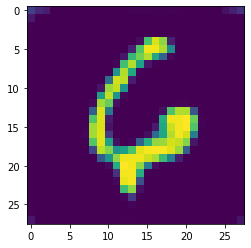

7


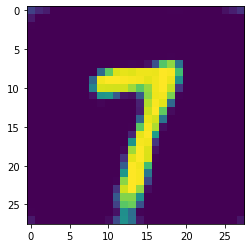

4


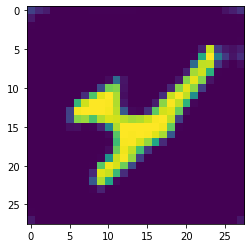

3


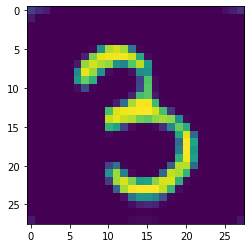

1


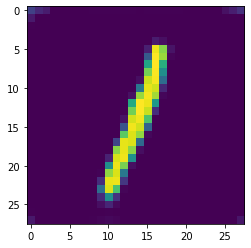

2


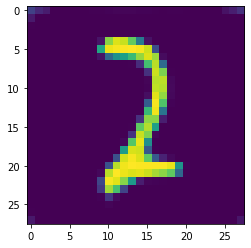

5


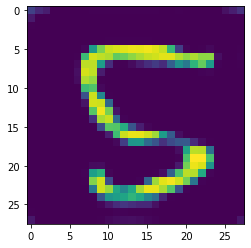

3


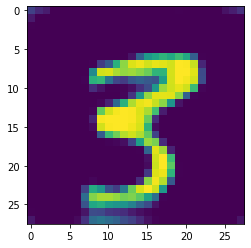

4


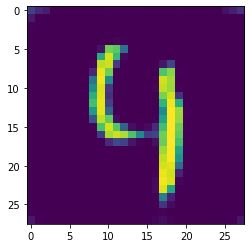

3


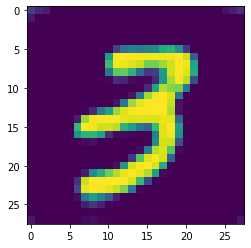

5


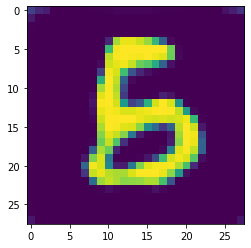

8


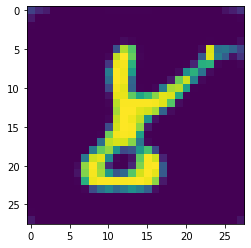

9


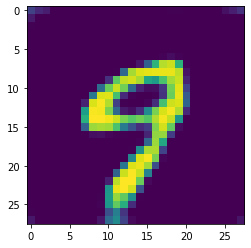

2


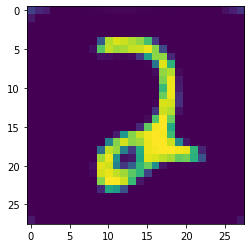

4


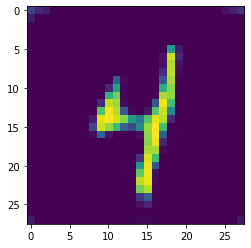

9


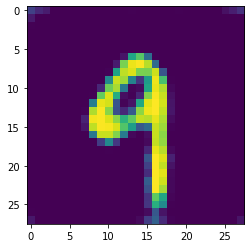

4


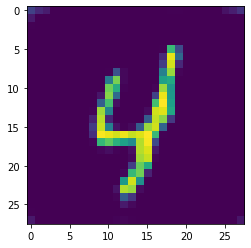

5


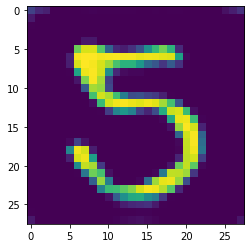

8


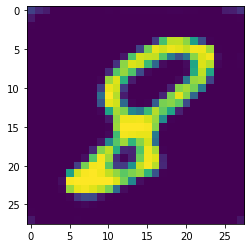

2


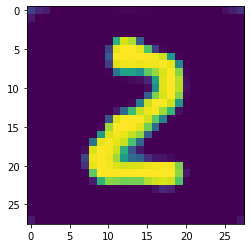

8


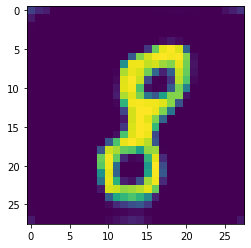

8


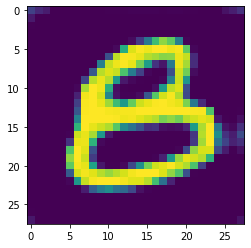

8


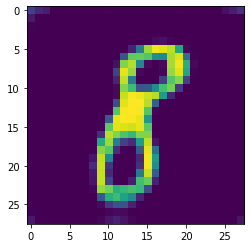

4


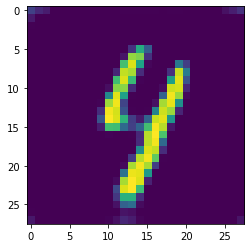

2


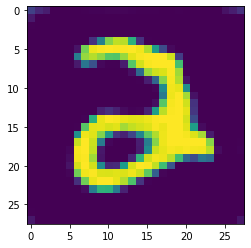

5


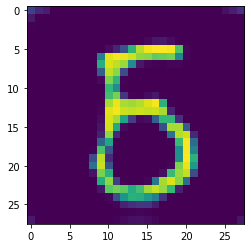

4


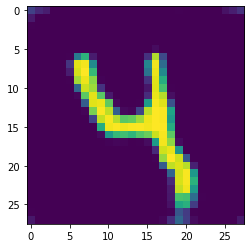

3


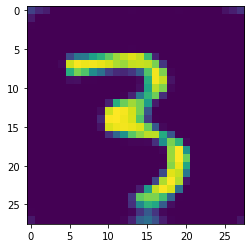

6


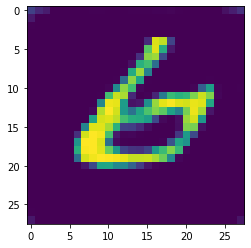

5


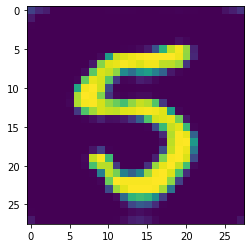

1


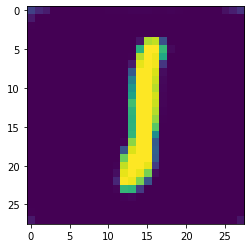

1


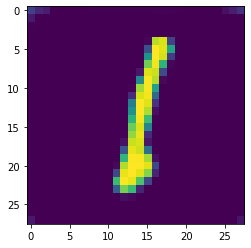

5


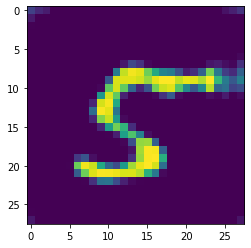

8


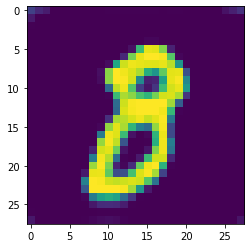

1


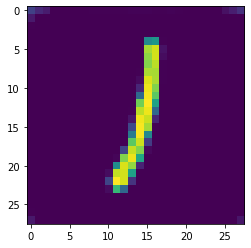

4


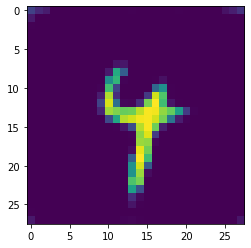

4


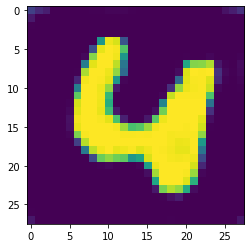

1


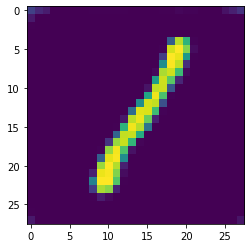

7


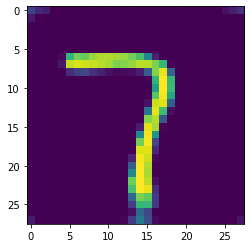

5


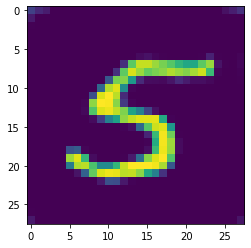

6


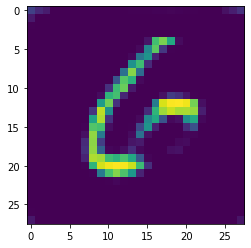

1


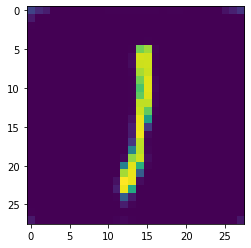

8


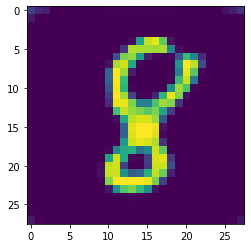

0


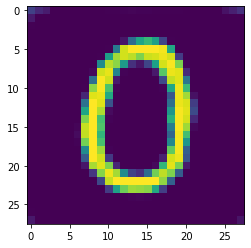

2


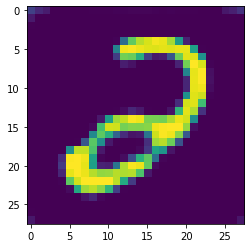

4


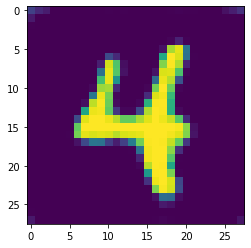

7


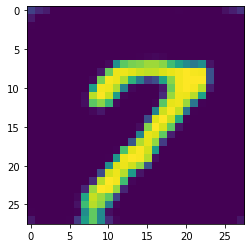

5


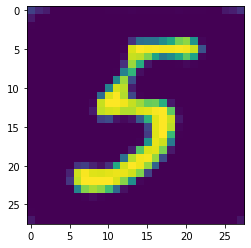

1


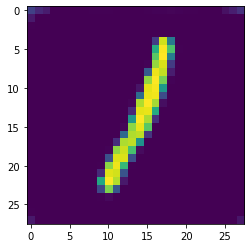

8


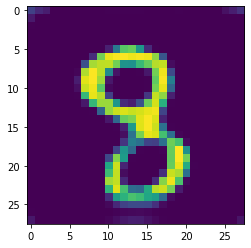

8


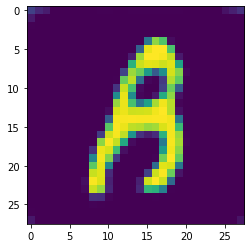

5


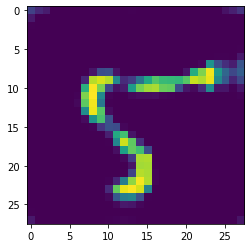

7


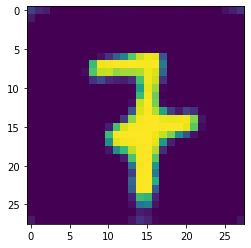

0


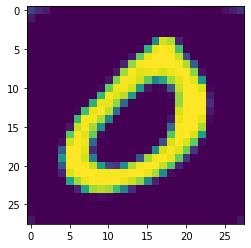

1


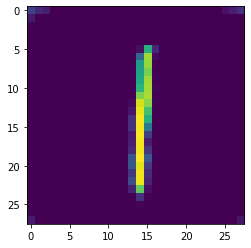

3


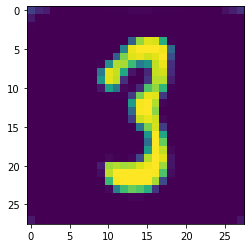

8


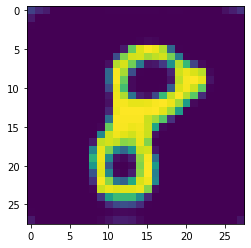

1


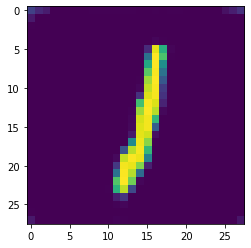

6


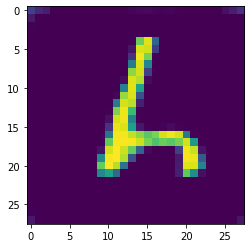

6


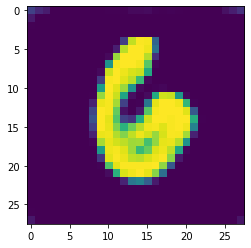

9


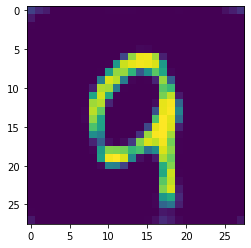

1


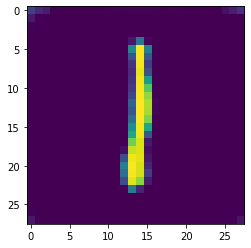

9


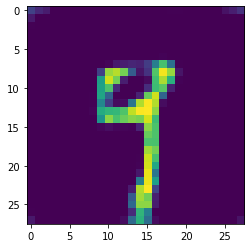

6


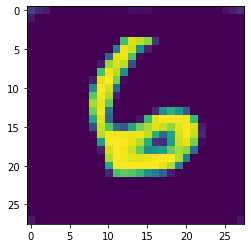

8


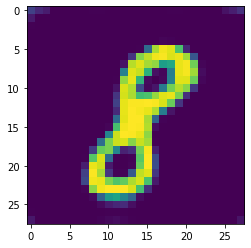

9


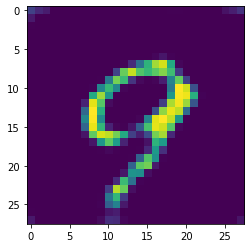

1


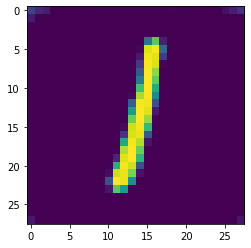

1


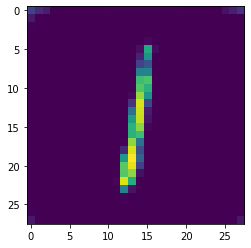

3


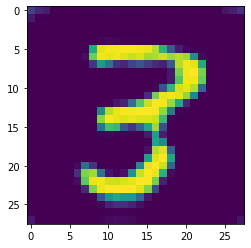

1


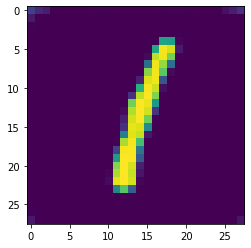

0


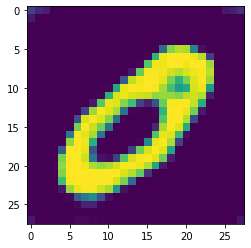

3


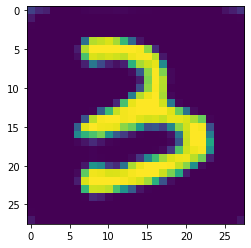

9


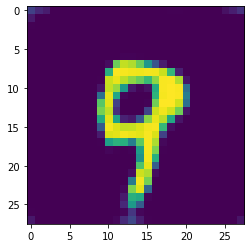

5


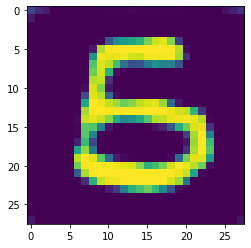

7


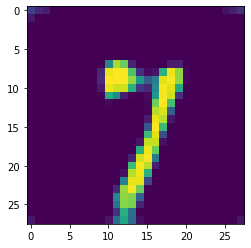

8


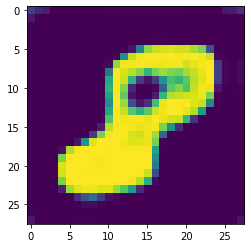

1


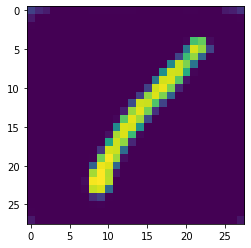

3


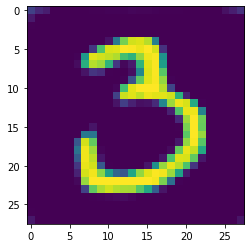

9


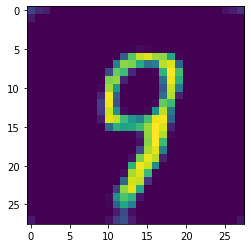

5


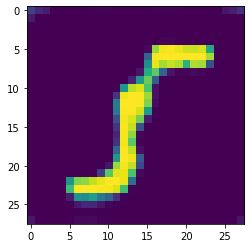

4


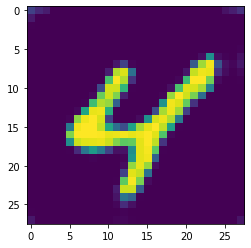

0


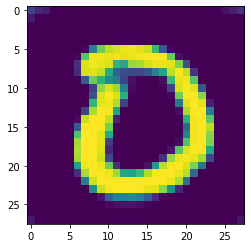

1


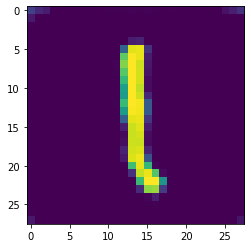

5


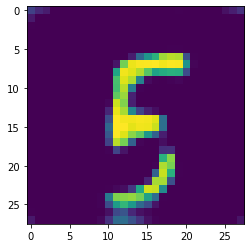

0


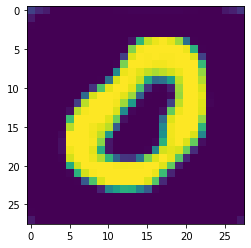

8


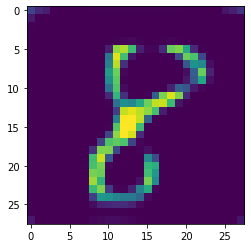

8


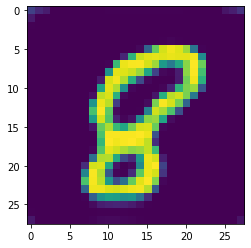

0


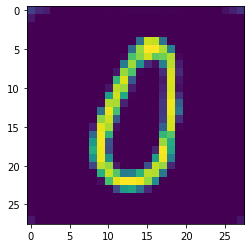

0


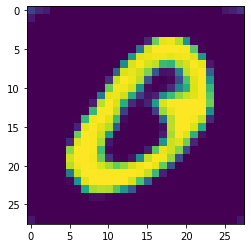

0


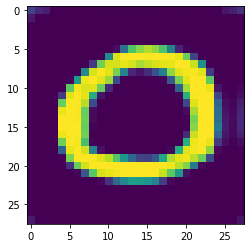

9


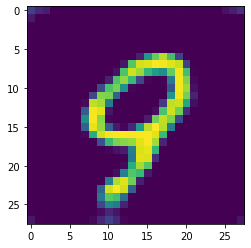

4


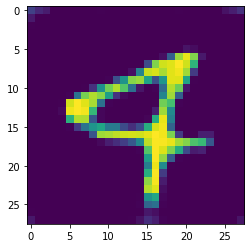

6


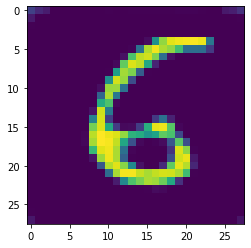

7


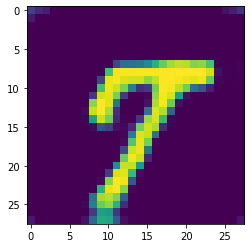

3


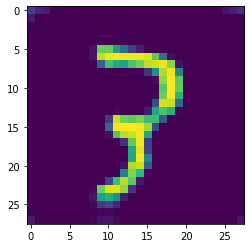

2


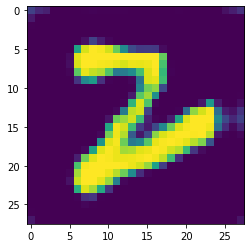

In [0]:
import numpy as np
import cv2
for data in test_set:
    img,label=data
    print(label)
    img=img.to(device)
    img=img.reshape(-1,1,28,28)# remove for FC
    out=model(img)
    #out=out[1]
    #out = out.transpose((1, 2, 0))
    out=out.view(28,28)
    out=out.cpu().detach().numpy()      
    #plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    plt.imshow(out)
    plt.show()   

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3


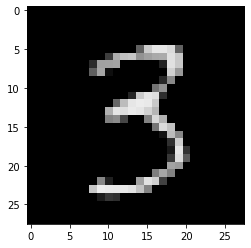

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


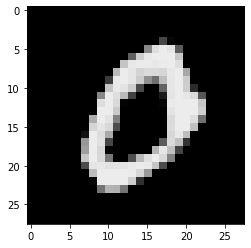

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


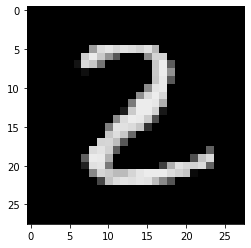

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


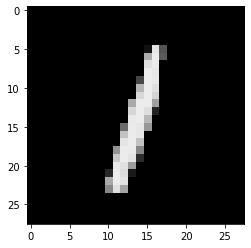

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6


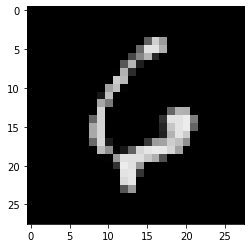

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


7


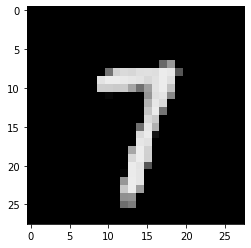

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4


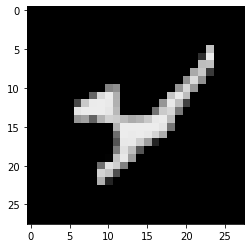

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3


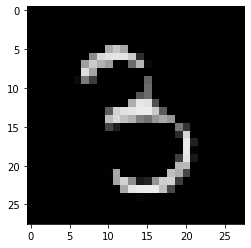

1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


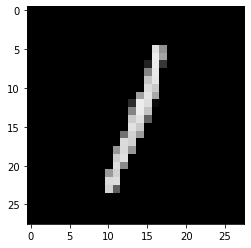

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


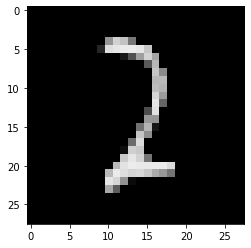

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5


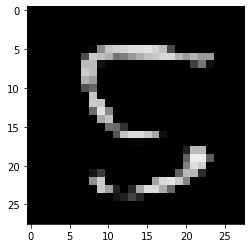

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3


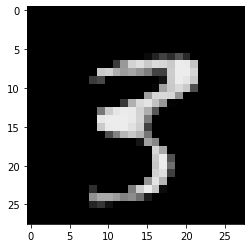

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4


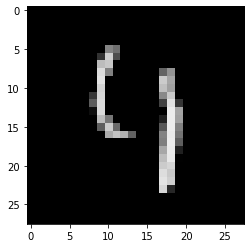

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3


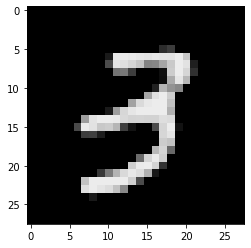

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5


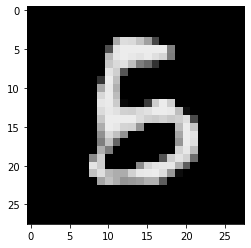

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8


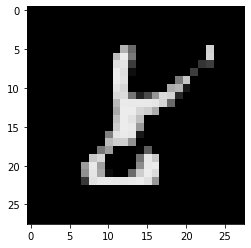

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9


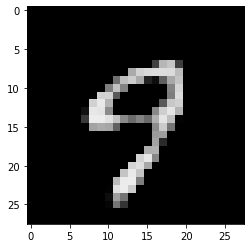

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


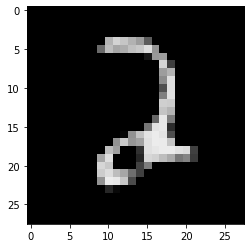

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4


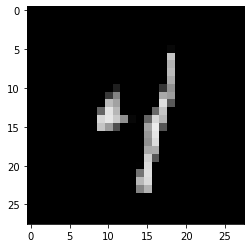

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9


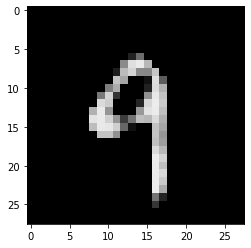

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4


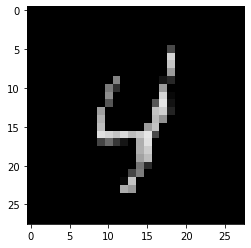

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5


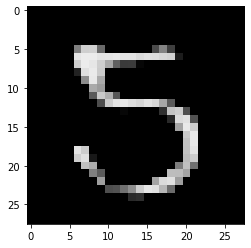

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8


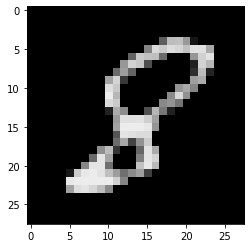

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


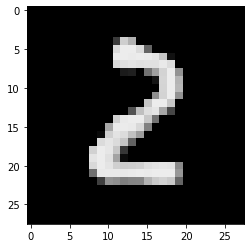

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8


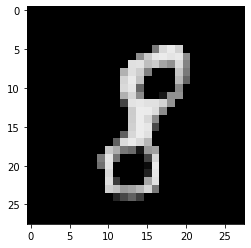

8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


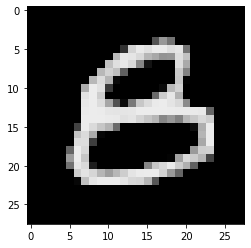

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8


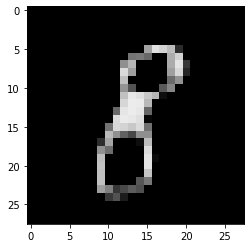

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4


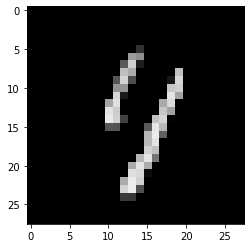

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


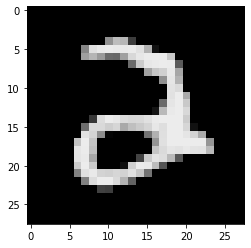

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5


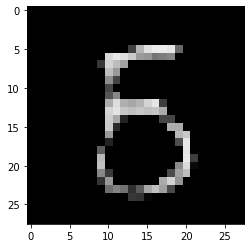

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4


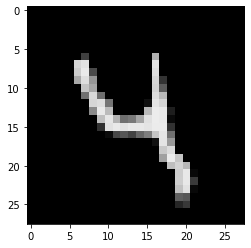

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3


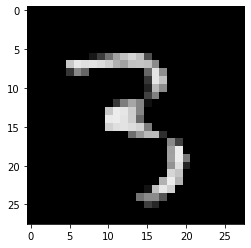

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6


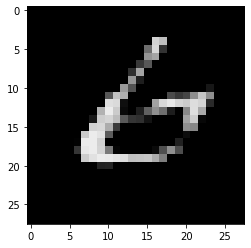

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5


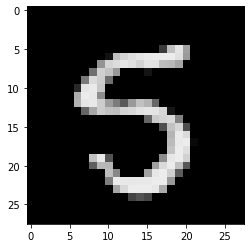

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


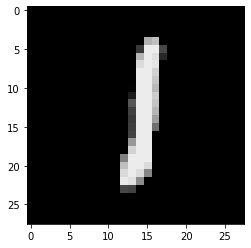

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


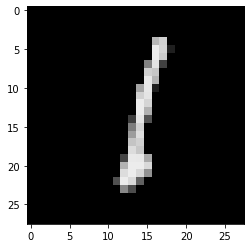

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5


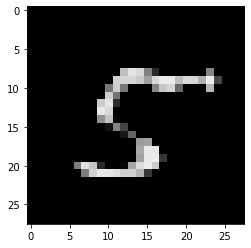

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8


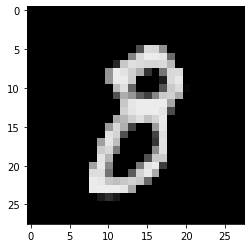

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


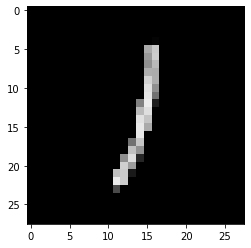

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4


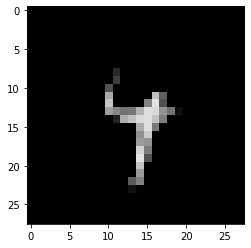

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4


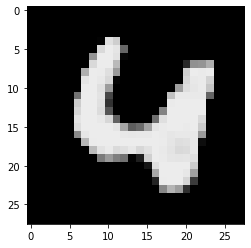

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


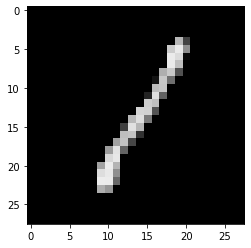

7


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


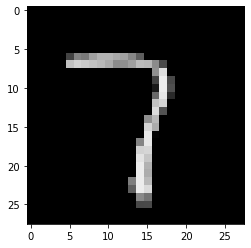

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5


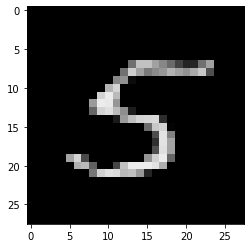

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6


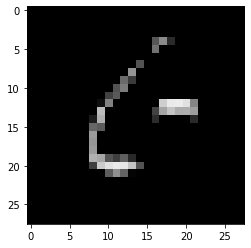

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


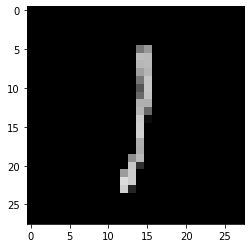

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8


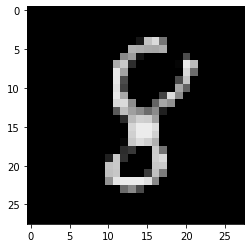

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


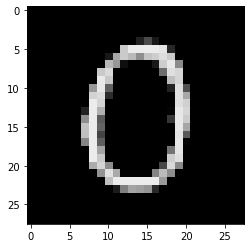

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


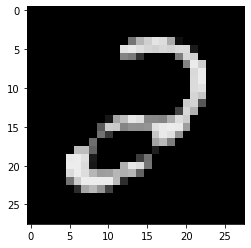

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4


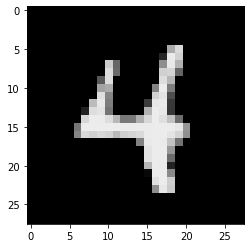

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


7


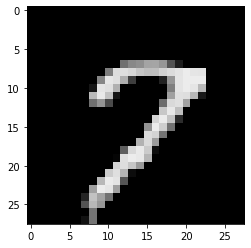

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5


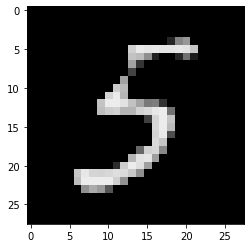

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


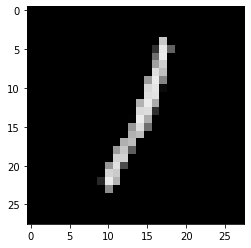

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8


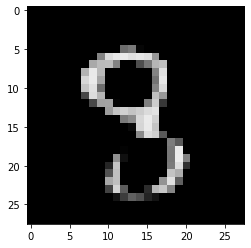

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8


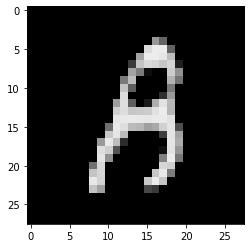

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5


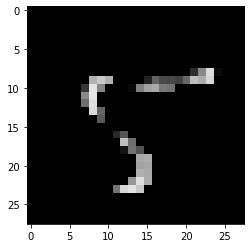

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


7


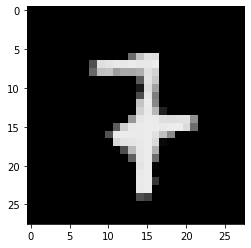

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


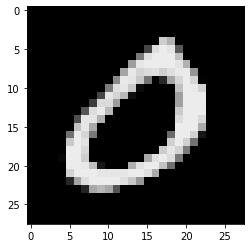

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


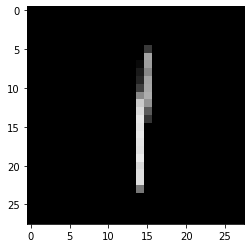

3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


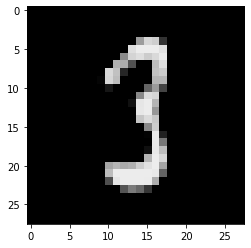

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8


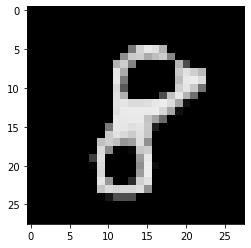

1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


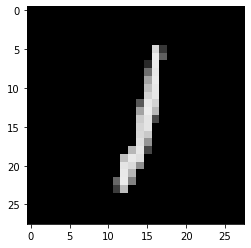

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6


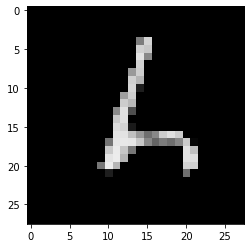

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6


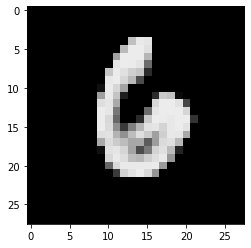

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9


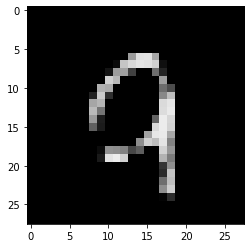

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


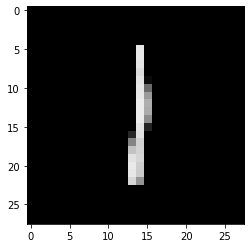

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9


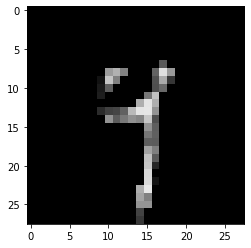

6


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


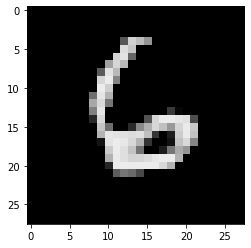

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8


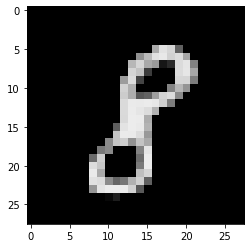

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9


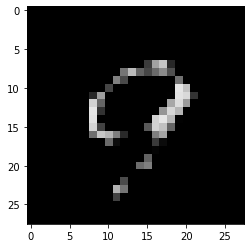

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


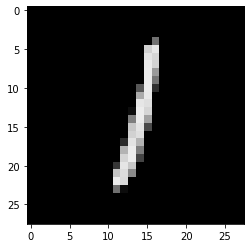

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


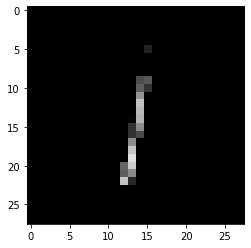

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3


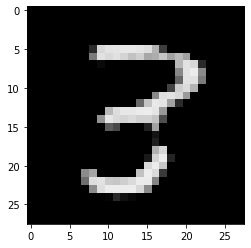

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


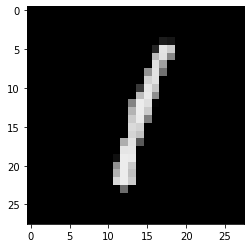

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


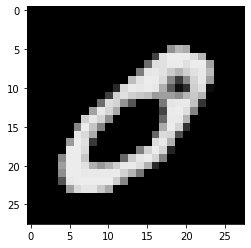

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3


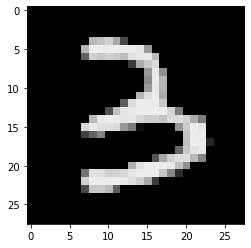

9


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


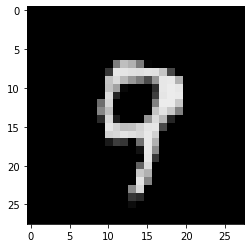

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5


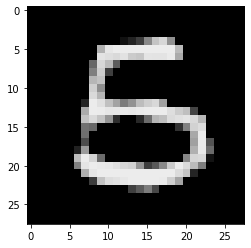

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


7


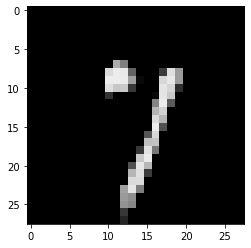

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8


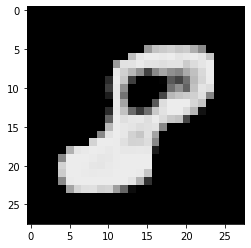

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


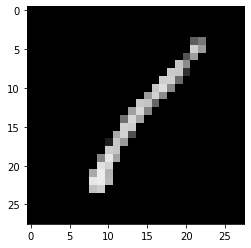

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


3


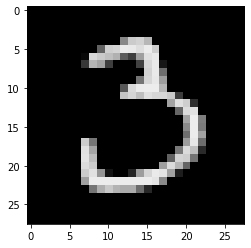

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9


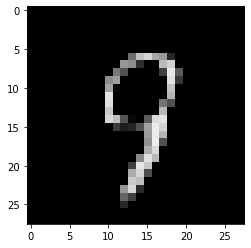

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5


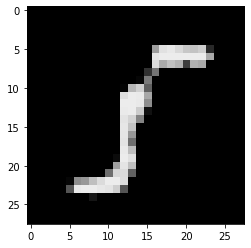

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4


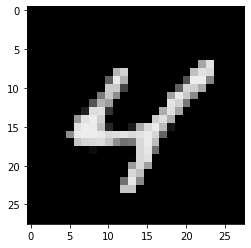

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


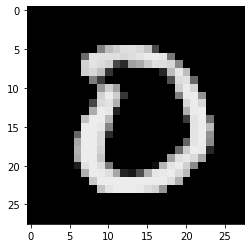

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1


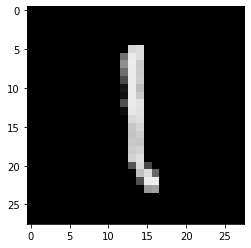

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5


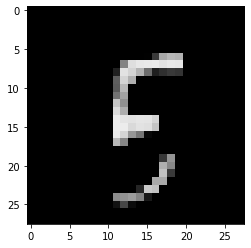

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


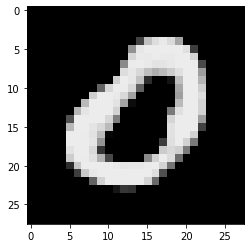

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8


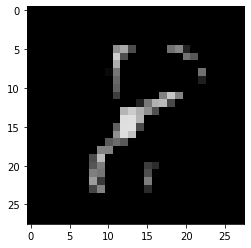

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


8


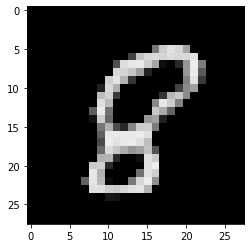

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


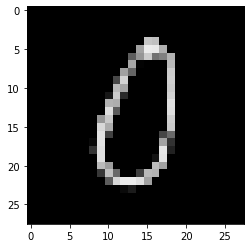

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0


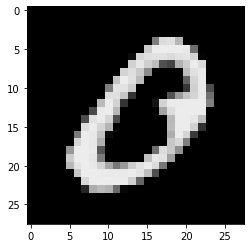

0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


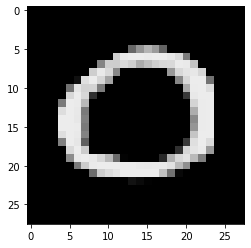

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


9


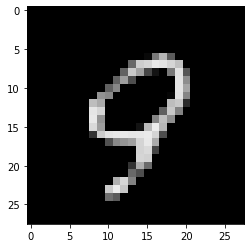

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4


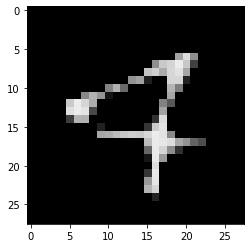

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


6


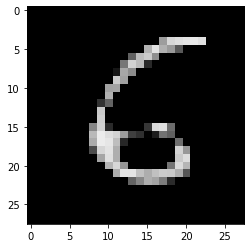

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


7


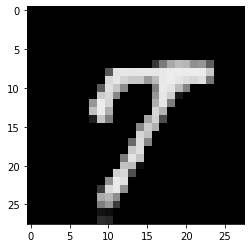

3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


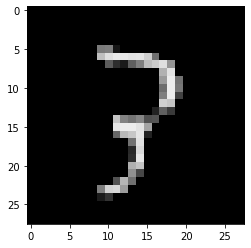

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


2


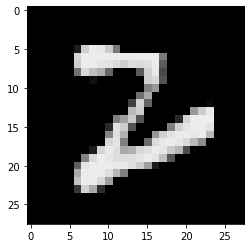

In [0]:

for data in test_set:
    img,label=data
    print(label)
    img=img.to(device)
    img=img.reshape(-1,1,28,28)
    out=model(img)
    #out=out[1]
    #out = out.transpose((1, 2, 0))
    out=out.view(28,28)
    out=out.cpu().detach().numpy()      
    plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
    #plt.imshow(out)
    plt.show()   